In [1]:
import numpy as np
import pandas as pd
import requests
import csv
import ssl
from urllib.request import urlopen
from urllib.parse import quote_plus

In [2]:
pd.set_option('display.max_columns', None)

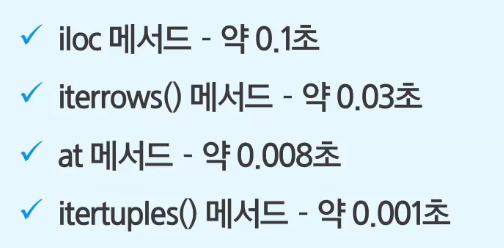

In [3]:
codi = pd.read_csv('./musinsa_codi.csv')

In [4]:
codi.head()

,codiId,codiStyle,codiTitle,codiContents,date,viewCnt,imgSrc,hashtags,clothes
0,13473,casual,오늘의 추천 코디,편하게 입기 좋은 카고 팬츠에 스웨트셔츠를 스타일링하고 스니커즈로 마무리한 캐주얼 룩,2022.03.11,"2,499",//image.msscdn.net/images/codimap/list/l_3_202...,"['그래픽', '꾸안꾸', '오버핏', '와이드핏', '카고', '빈티지']","[['2053541', '트래블', '워시드 후드 윈드 브레이커 차콜', '//im..."
1,13472,casual,편하게 꾸미기,그래픽이 돋보이는 반팔 티셔츠에 윈드브레이커를 매치한 후 벌룬 핏 팬츠로 마무리한 캐주얼,2022.03.11,"2,317",//image.msscdn.net/images/codimap/list/l_3_202...,"['그래픽', '벌룬핏', '오버핏', '편안한', '캠퍼스', '신학기', '꾸안꾸']","[['2340867', '트래블', '써밋 후드 윈드 브레이커 사파이어 블루', '..."
2,13471,casual,끌리는 매력,"모노 톤의 윈드브레이커에 카라 티셔츠와 조거 팬츠를 스타일링하고 스니커즈, 볼캡으로...",2022.03.11,"1,669",//image.msscdn.net/images/codimap/list/l_3_202...,"['모노톤', '편안한', '원마일웨어', '와이드핏']","[['2340573', '트래블', '고프 후드 윈드 브레이커 그레이', '//im..."
3,13470,casual,컬러 포인트,그린 컬러가 돋보이는 나일론 재킷에 스웨트 셋업을 매치한 후 스니커즈로 포인트를 준...,2022.03.11,"1,153",//image.msscdn.net/images/codimap/list/l_3_202...,"['체크', '편안한', '셋업코디', '원마일웨어', '컬러포인트', '레이어드룩']","[['2340569', '트래블', '고프 후드 윈드 브레이커 옐로우 그린', '/..."
4,13469,casual,간편한 외출,그래픽이 돋보이는 스웨트셔츠와 트레이닝 팬츠를 코디하고 비니로 완성한 캐주얼 룩,2022.03.11,"2,138",//image.msscdn.net/images/codimap/list/l_3_202...,"['그래픽', '편안한', '원마일웨어', '핀턱', '와이드핏']","[['1285424', '트래블', '어프로칭 후드 윈드 브레이커 블랙', '//i..."


### Codi.date 전처리

In [5]:
result = []
for i in range(len(codi)):
    if len(codi.date[i].split('.')) != 3:
        result.append(i)
result

[]

In [6]:
codi.insert(5, 'dateDay', 0, True)
codi.insert(5, 'dateMonth', 0, True)
codi.insert(5, 'dateYear', 0, True)

In [7]:
codi.dateYear = codi.apply(lambda x: x.date.split(".")[0], axis=1)
codi.dateMonth = codi.apply(lambda x: x.date.split(".")[1], axis=1)
codi.dateDay = codi.apply(lambda x: x.date.split(".")[2], axis=1)

### Codi.codiStyle 전처리

In [8]:
codi.codiStyle.value_counts()

casual            4940
street            1192
formal            1164
dandy             1004
golf               784
girlish            755
romantic           594
sports             464
chic               253
americancasual     229
retro               38
Name: codiStyle, dtype: int64

### Codi.viewCnt 전처리

In [9]:
codi.viewCnt = codi.viewCnt.apply(lambda x: x.replace(",", ""))

In [10]:
codi.describe()

,codiId
count,11417.000000
mean,6674.732154
std,3891.766057
min,1.000000
25%,3264.000000
50%,6675.000000
75%,10034.000000
max,13473.000000


### Codi.hashtags 전처리

In [11]:
a = []
cnt = 0
for i in codi.hashtags:
    a += i.split(',')
    cnt += 1
a = pd.DataFrame(a)
a[0] = a[0].apply(lambda x: x.replace("'", ""))
a[0] = a[0].apply(lambda x: x.replace("[", ""))
a[0] = a[0].apply(lambda x: x.replace("]", ""))
a[0] = a[0].apply(lambda x: x.replace(" ", ""))
hashtag_list = a[0].unique()

In [12]:
hashtag_list

array(['그래픽', '꾸안꾸', '오버핏', '와이드핏', '카고', '빈티지', '벌룬핏', '편안한', '캠퍼스',
       '신학기', '모노톤', '원마일웨어', '체크', '셋업코디', '컬러포인트', '레이어드룩', '핀턱',
       '로고플레이', '아가일', '워싱', '남친룩', '코듀로이', '메쉬', '레터링', '퀼팅', '콜라보',
       '스티치', '슬릿', '맥시', '플라워', '크롭', '미니멀', '데이트', '컬러블록', '에코', '청청패션',
       '레더', '비비드', '뉴트럴톤', '레귤러핏', '루즈핏', '부츠컷', '키높이', '파스텔', '화사한',
       '피크닉', '스트라이프', '리버서블', '시티보이룩', '테이퍼드핏', '슬림핏', '플리츠', '귀여운',
       '폭염', '찢청', '페인팅', '카무플라주', '와펜', '밀리터리', '데미지', '럭셔리', '패치워크',
       '유니크', '리조트룩', '네온', '캐릭터', '타이다이', '페이즐리', '린넨', '날염', '시스루',
       '올블랙', '그라데이션', '짧치', '플리스', '비', '톤온톤', '심볼', '애니멀', '스트링',
       '아메카지', '비건패션', '스웨이드', '얼죽코', '퍼', '영캐주얼', '명절', '레오퍼드', '할로윈',
       '미세먼지', '스키니', '믹스매치', '셀럽템', '환절기', '셔링', '글로시', '퍼프소매', '한파',
       '캠핑', '올화이트', '하이웨이스트', '트위드', '앙고라', '래글런', '크로셰', '여친룩', '시폰',
       '빅카라', '여행', '크리스마스', '벨루어', '힙합', '', '오프숄더', '트로피컬', '도트', '레이스',
       '펀칭', 'SELF_LOVE', '페스티벌', '프레피룩', '테니스', '에스닉룩', '라탄', '큐빅',
       '

In [13]:
codi.hashtags[0]

"['그래픽', '꾸안꾸', '오버핏', '와이드핏', '카고', '빈티지']"

In [14]:
codi.hashtags = codi.hashtags.apply(lambda x: x.replace("['", "").replace("']", "").replace("'", "").replace(" ", "").split(','))

In [15]:
codi.insert(8, "codiOther", 0,  True)
codi.insert(8, "codiGolf", 0, True)
codi.insert(8, "codiHip", 0, True)
codi.insert(8, "codiInterview", 0, True)
codi.insert(8, "codiSports", 0, True)
codi.insert(8, "codiBusiness", 0, True)
codi.insert(8, "codiWedding", 0, True)
codi.insert(8, "codiTravel", 0, True)
codi.insert(8, "codiParty", 0, True)
codi.insert(8, "codiCampus", 0, True)
codi.insert(8, "codiDaily", 0, True)
codi.insert(8, "codiDate", 0, True)

In [16]:
codi.codiOther

0        0
1        0
2        0
3        0
4        0
        ..
11412    0
11413    0
11414    0
11415    0
11416    0
Name: codiOther, Length: 11417, dtype: int64

In [17]:
date = {'레이어드룩', '데이트', '캠퍼스', '남친룩', '피크닉', '여친룩', '소개팅', '퍼프소매', '아메카지', '청청패션', '스웨이드', '단아한'}
daily = {'스티치', '꾸안꾸', '에코', '편안한', '원마일웨어', '레더', '영캐주얼', '청청패션', '네온', '클래식', '시티보이룩', '아메카지', '벨루어', '스키니', '믹스매치', '찢청'}
campus = {'신학기', '캠퍼스', '얼죽코', '소개팅', '레이어드룩'}
party = {'할로윈', '페스티벌', '크리스마스', '파티'}
travel = {'남친룩', '피크닉', '편안한', '린넨', '캠핑', '단아한', '트로피컬', '여행', '리조트룩'}
wedding = {'미니멀', '상견례', '단정한', '하객', '격식', '우아한'}
wedding_diff = {'레더', '데이트'}
business = {'핀턱', '미니멀', '쿨비즈', '출근룩', '단정한', '격식', '면접'}
sports = {'편안한', '원마일웨어', '스포티', '테니스', '레저스포츠', '네온', '보더룩', '캠핑', '애슬레저룩', '등산', '요가', '수영'}
interview = {'미니멀', '면접', '격식', '단정한'}
hip = {'오버핏', '벌룬핏', '크롭', '그래픽', '스트링', '유니크', '힙합', '타이다이', '패치워크', '레오퍼드', '페인팅', '데미지', '하이틴룩'}
golf = {'테니스'}

In [18]:
a = set(codi.hashtags[0])
if a.intersection(date):
    print(a)

In [19]:
codi['hashtags']

0                 [그래픽, 꾸안꾸, 오버핏, 와이드핏, 카고, 빈티지]
1            [그래픽, 벌룬핏, 오버핏, 편안한, 캠퍼스, 신학기, 꾸안꾸]
2                        [모노톤, 편안한, 원마일웨어, 와이드핏]
3           [체크, 편안한, 셋업코디, 원마일웨어, 컬러포인트, 레이어드룩]
4                    [그래픽, 편안한, 원마일웨어, 핀턱, 와이드핏]
                          ...                   
11412    [크롭, 로고플레이, 찢청, 페스티벌, 유니크, 와이드핏, 컬러포인트]
11413           [타이다이, 스트라이프, 스티치, 카고, 유니크, 비비드]
11414                   [힙합, 유니크, 카고, 타이다이, 키높이]
11415                       [컬러블록, 유니크, 카고, 오버핏]
11416              [컬러블록, 유니크, 비비드, 로고플레이, 타이다이]
Name: hashtags, Length: 11417, dtype: object

In [20]:
set(codi.loc[1].hashtags).intersection(date)

{'캠퍼스'}

In [21]:
codi.columns

Index(['codiId', 'codiStyle', 'codiTitle', 'codiContents', 'date', 'dateYear',
       'dateMonth', 'dateDay', 'codiDate', 'codiDaily', 'codiCampus',
       'codiParty', 'codiTravel', 'codiWedding', 'codiBusiness', 'codiSports',
       'codiInterview', 'codiHip', 'codiGolf', 'codiOther', 'viewCnt',
       'imgSrc', 'hashtags', 'clothes'],
      dtype='object')

In [22]:
# 각각의 스타일에 맞게 1 지정
codi.codiDate = codi.apply(lambda x: 1 if set(x.hashtags).intersection(date) else x.codiDate, axis=1)
codi.codiDaily = codi.apply(lambda x: 1 if set(x.hashtags).intersection(daily) else x.codiDaily, axis=1)
codi.codiCampus = codi.apply(lambda x: 1 if set(x.hashtags).intersection(campus) else x.codiCampus, axis=1)
codi.codiParty = codi.apply(lambda x: 1 if set(x.hashtags).intersection(party) else x.codiParty, axis=1)
codi.codiTravel = codi.apply(lambda x: 1 if set(x.hashtags).intersection(travel) else x.codiTravel, axis=1)
codi.codiWedding = codi.apply(lambda x: 1 if set(x.hashtags).intersection(wedding) and set(x.hashtags).difference(wedding_diff) else x.codiWedding, axis=1)
codi.codiBusiness = codi.apply(lambda x: 1 if set(x.hashtags).intersection(business) else x.codiBusiness, axis=1)
codi.codiSports = codi.apply(lambda x: 1 if set(x.hashtags).intersection(sports) else x.codiSports, axis=1)
codi.codiInterview = codi.apply(lambda x: 1 if set(x.hashtags).intersection(interview) else x.codiInterview, axis=1)
codi.codiHip = codi.apply(lambda x: 1 if set(x.hashtags).intersection(hip) else x.codiHip, axis=1)
codi.codiGolf = codi.apply(lambda x: 1 if set(x.hashtags).intersection(golf) else x.codiGolf, axis=1)

In [23]:
# other 지정
codi.codiOther = codi.apply(lambda x: 1 if (x.codiDate==0 and x.codiDaily==0 and x.codiCampus==0 and x.codiParty==0 and x.codiTravel==0 and x.codiWedding==0 and x.codiBusiness==0 and x.codiSports==0 and x.codiInterview==0 and x.codiHip==0 and x.codiGolf==0) else x.codiOther, axis=1)

In [24]:
# 골프 지정
codi.codiGolf = codi.apply(lambda x: 1 if x.codiStyle=='golf' else x.codiGolf, axis=1)

In [25]:
codi.describe()

,codiId,codiDate,codiDaily,codiCampus,codiParty,codiTravel,codiWedding,codiBusiness,codiSports,codiInterview,codiHip,codiGolf,codiOther
count,11417.000000,11417.000000,11417.000000,11417.000000,11417.000000,11417.000000,11417.000000,11417.000000,11417.000000,11417.000000,11417.000000,11417.000000,11417.000000
mean,6674.732154,0.404047,0.438119,0.293422,0.018656,0.210213,0.107734,0.144434,0.147061,0.098800,0.306210,0.068845,0.286503
std,3891.766057,0.490728,0.496178,0.455350,0.135314,0.407478,0.310058,0.351544,0.354183,0.298406,0.460938,0.253201,0.452147
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3264.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6675.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,10034.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,13473.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Codi.clothes 전처리

In [26]:
codi.clothes[0]

"[['2053541', '트래블', '워시드 후드 윈드 브레이커 차콜', '//image.msscdn.net/images/goods_img/20210809/2053541/2053541_1_220.jpg', '69900'], ['2310977', '트래블', '칸투어 로고 피그먼트 하프 집업 스웨트셔츠 고스트 그레이', '//image.msscdn.net/images/goods_img/20220117/2310977/2310977_2_220.jpg', '56900'], ['1935892', '트래블', '미시간 울버린 피그먼트 반팔티 크림', '//image.msscdn.net/images/goods_img/20210504/1935892/1935892_1_220.jpg', '25900'], ['2340611', '트래블', '지오메트리컬 와이드 카고 팬츠 카키', '//image.msscdn.net/images/goods_img/20220204/2340611/2340611_1_220.jpg', '59900'], ['2328625', '시티스트리트', 'LOGO NYLON LONG BILL CAP NAVY', '//image.msscdn.net/images/goods_img/20220126/2328625/2328625_1_220.jpg', '31500'], ['1545217', '아식스', '젤-카하나 8 - 블랙 / 1011B133-001', '//image.msscdn.net/images/goods_img/20200811/1545217/1545217_1_220.jpg', '82900']]"

In [27]:
codi.clothes = codi.clothes.apply(lambda x: x.split('],'))

In [28]:
for i in range(codi.shape[0]):
    for j in range(len(codi.clothes[i])):
        codi.clothes[i][j] = codi.clothes[i][j].replace("[['", "").replace("[", "").replace(" '", "").replace("'", "").replace("]]", "").split(',')

In [29]:
codi.clothes[0]

[['2053541',
  '트래블',
  '워시드 후드 윈드 브레이커 차콜',
  '//image.msscdn.net/images/goods_img/20210809/2053541/2053541_1_220.jpg',
  '69900'],
 ['2310977',
  '트래블',
  '칸투어 로고 피그먼트 하프 집업 스웨트셔츠 고스트 그레이',
  '//image.msscdn.net/images/goods_img/20220117/2310977/2310977_2_220.jpg',
  '56900'],
 ['1935892',
  '트래블',
  '미시간 울버린 피그먼트 반팔티 크림',
  '//image.msscdn.net/images/goods_img/20210504/1935892/1935892_1_220.jpg',
  '25900'],
 ['2340611',
  '트래블',
  '지오메트리컬 와이드 카고 팬츠 카키',
  '//image.msscdn.net/images/goods_img/20220204/2340611/2340611_1_220.jpg',
  '59900'],
 ['2328625',
  '시티스트리트',
  'LOGO NYLON LONG BILL CAP NAVY',
  '//image.msscdn.net/images/goods_img/20220126/2328625/2328625_1_220.jpg',
  '31500'],
 ['1545217',
  '아식스',
  '젤-카하나 8 - 블랙 / 1011B133-001',
  '//image.msscdn.net/images/goods_img/20200811/1545217/1545217_1_220.jpg',
  '82900']]

### Codi.codiId 인덱스 지정

In [30]:
codi.head()

,codiId,codiStyle,codiTitle,codiContents,date,dateYear,dateMonth,dateDay,codiDate,codiDaily,codiCampus,codiParty,codiTravel,codiWedding,codiBusiness,codiSports,codiInterview,codiHip,codiGolf,codiOther,viewCnt,imgSrc,hashtags,clothes
0,13473,casual,오늘의 추천 코디,편하게 입기 좋은 카고 팬츠에 스웨트셔츠를 스타일링하고 스니커즈로 마무리한 캐주얼 룩,2022.03.11,2022,03,11,0,1,0,0,0,0,0,0,0,1,0,0,2499,//image.msscdn.net/images/codimap/list/l_3_202...,"[그래픽, 꾸안꾸, 오버핏, 와이드핏, 카고, 빈티지]","[[2053541, 트래블, 워시드 후드 윈드 브레이커 차콜, //image.mss..."
1,13472,casual,편하게 꾸미기,그래픽이 돋보이는 반팔 티셔츠에 윈드브레이커를 매치한 후 벌룬 핏 팬츠로 마무리한 캐주얼,2022.03.11,2022,03,11,1,1,1,0,1,0,0,1,0,1,0,0,2317,//image.msscdn.net/images/codimap/list/l_3_202...,"[그래픽, 벌룬핏, 오버핏, 편안한, 캠퍼스, 신학기, 꾸안꾸]","[[2340867, 트래블, 써밋 후드 윈드 브레이커 사파이어 블루, //image..."
2,13471,casual,끌리는 매력,"모노 톤의 윈드브레이커에 카라 티셔츠와 조거 팬츠를 스타일링하고 스니커즈, 볼캡으로...",2022.03.11,2022,03,11,0,1,0,0,1,0,0,1,0,0,0,0,1669,//image.msscdn.net/images/codimap/list/l_3_202...,"[모노톤, 편안한, 원마일웨어, 와이드핏]","[[2340573, 트래블, 고프 후드 윈드 브레이커 그레이, //image.mss..."
3,13470,casual,컬러 포인트,그린 컬러가 돋보이는 나일론 재킷에 스웨트 셋업을 매치한 후 스니커즈로 포인트를 준...,2022.03.11,2022,03,11,1,1,1,0,1,0,0,1,0,0,0,0,1153,//image.msscdn.net/images/codimap/list/l_3_202...,"[체크, 편안한, 셋업코디, 원마일웨어, 컬러포인트, 레이어드룩]","[[2340569, 트래블, 고프 후드 윈드 브레이커 옐로우 그린, //image...."
4,13469,casual,간편한 외출,그래픽이 돋보이는 스웨트셔츠와 트레이닝 팬츠를 코디하고 비니로 완성한 캐주얼 룩,2022.03.11,2022,03,11,0,1,0,0,1,0,1,1,0,1,0,0,2138,//image.msscdn.net/images/codimap/list/l_3_202...,"[그래픽, 편안한, 원마일웨어, 핀턱, 와이드핏]","[[1285424, 트래블, 어프로칭 후드 윈드 브레이커 블랙, //image.ms..."


In [31]:
codi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11417 entries, 0 to 11416
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   codiId         11417 non-null  int64 
 1   codiStyle      11417 non-null  object
 2   codiTitle      11417 non-null  object
 3   codiContents   11417 non-null  object
 4   date           11417 non-null  object
 5   dateYear       11417 non-null  object
 6   dateMonth      11417 non-null  object
 7   dateDay        11417 non-null  object
 8   codiDate       11417 non-null  int64 
 9   codiDaily      11417 non-null  int64 
 10  codiCampus     11417 non-null  int64 
 11  codiParty      11417 non-null  int64 
 12  codiTravel     11417 non-null  int64 
 13  codiWedding    11417 non-null  int64 
 14  codiBusiness   11417 non-null  int64 
 15  codiSports     11417 non-null  int64 
 16  codiInterview  11417 non-null  int64 
 17  codiHip        11417 non-null  int64 
 18  codiGolf       11417 non-n

In [32]:
codi.dateYear = codi.dateYear.astype('int')
codi.dateMonth = codi.dateMonth.astype('int')
codi.dateDay = codi.dateDay.astype('int')
codi.viewCnt = codi.viewCnt.astype('int')

In [33]:
codi.to_csv('final_codi.csv',
                 sep=',',
                 float_format = '%.1f',
                 encoding = 'utf-8-sig')

In [34]:
codi.to_json('final_codi1.json', orient='records', force_ascii=False)